In [7]:
#loading libraries 
#Add libraries here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
#loading data set into the data frame
df = pd.read_csv("data/dataPakistan.csv",low_memory=False)
pd.options.display.max_rows = 999

In [7]:
#basic data
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Columns: 166 entries, Language to Time to completion
dtypes: float64(26), int64(48), object(92)
memory usage: 12.6+ MB


Index(['Language', 'Encrypted Email', 'Overall MHQ', 'Core Cognition',
       'Complex Cognition', 'Drive & Motivation', 'Mood & Outlook',
       'Social & Self', 'Mind Body Connection', 'Age',
       ...
       'Suffered a loss in a major fire, flood, earthquake, or natural disaster.1',
       'Displacement from your home due to political, environmental or economic reasons.1',
       'Loss of your job or livelihood leading to an inability to make ends meet.',
       'Serious injury, harm, or death you caused to someone else.1',
       'Caring for a child or partner with a major chronic disability or illness',
       'Threatening, coercive or controlling behavior by another person.1',
       'Forced family control over major life decisions (e.g. marriage).1',
       'Start Date (UTC)', 'Submit Date (UTC)', 'Time to completion'],
      dtype='object', length=166)

In [8]:
# Change this variable if you want the pivoting point between 0 and 1 
# 0 and 1 means 0 is critical and 1 is ok status in mental health
# this code is mapping this to the given MHQ score in the given
# data pivot value -50 will match all above as ok and all below as 
# critical.  
pivot = 0
#code to add the y label
df["status"] = -1
status_label = df["status"]
MHQ = df["Overall MHQ"]
for index,row in enumerate(status_label):
    if MHQ[index] > pivot:
        status_label[index] = 1
    else:
        status_label[index] = 0
df["status"] = status_label
for i in df["status"]:
    print(i)

/tmp/ipykernel_113658/3312166670.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_label[index] = 1
/tmp/ipykernel_113658/3312166670.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_label[index] = 0


1
1
1
0
0
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
1
1
1
0
1
0
0
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
0
0
1
0
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
0
0
1
0
0
1
1
0
0
1
1
0
0
1
0
1
1
0
1
1
1
1
0
0
0
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
0
1
1
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1


In [9]:
#now we need to check null values, we dealt with some in emp_length but lets see the whole picture
df.isnull().sum().sort_values()
#running the following codes we can see the data is ready to put into the model now

Language                                                                                                                                                                                                                                 0
Mood Swings                                                                                                                                                                                                                              0
Unwanted, Strange or Obsessive Thoughts                                                                                                                                                                                                  0
Avoidance & Withdrawal                                                                                                                                                                                                                   0
Aggression Towards Others                                   

/tmp/ipykernel_113658/30158991.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


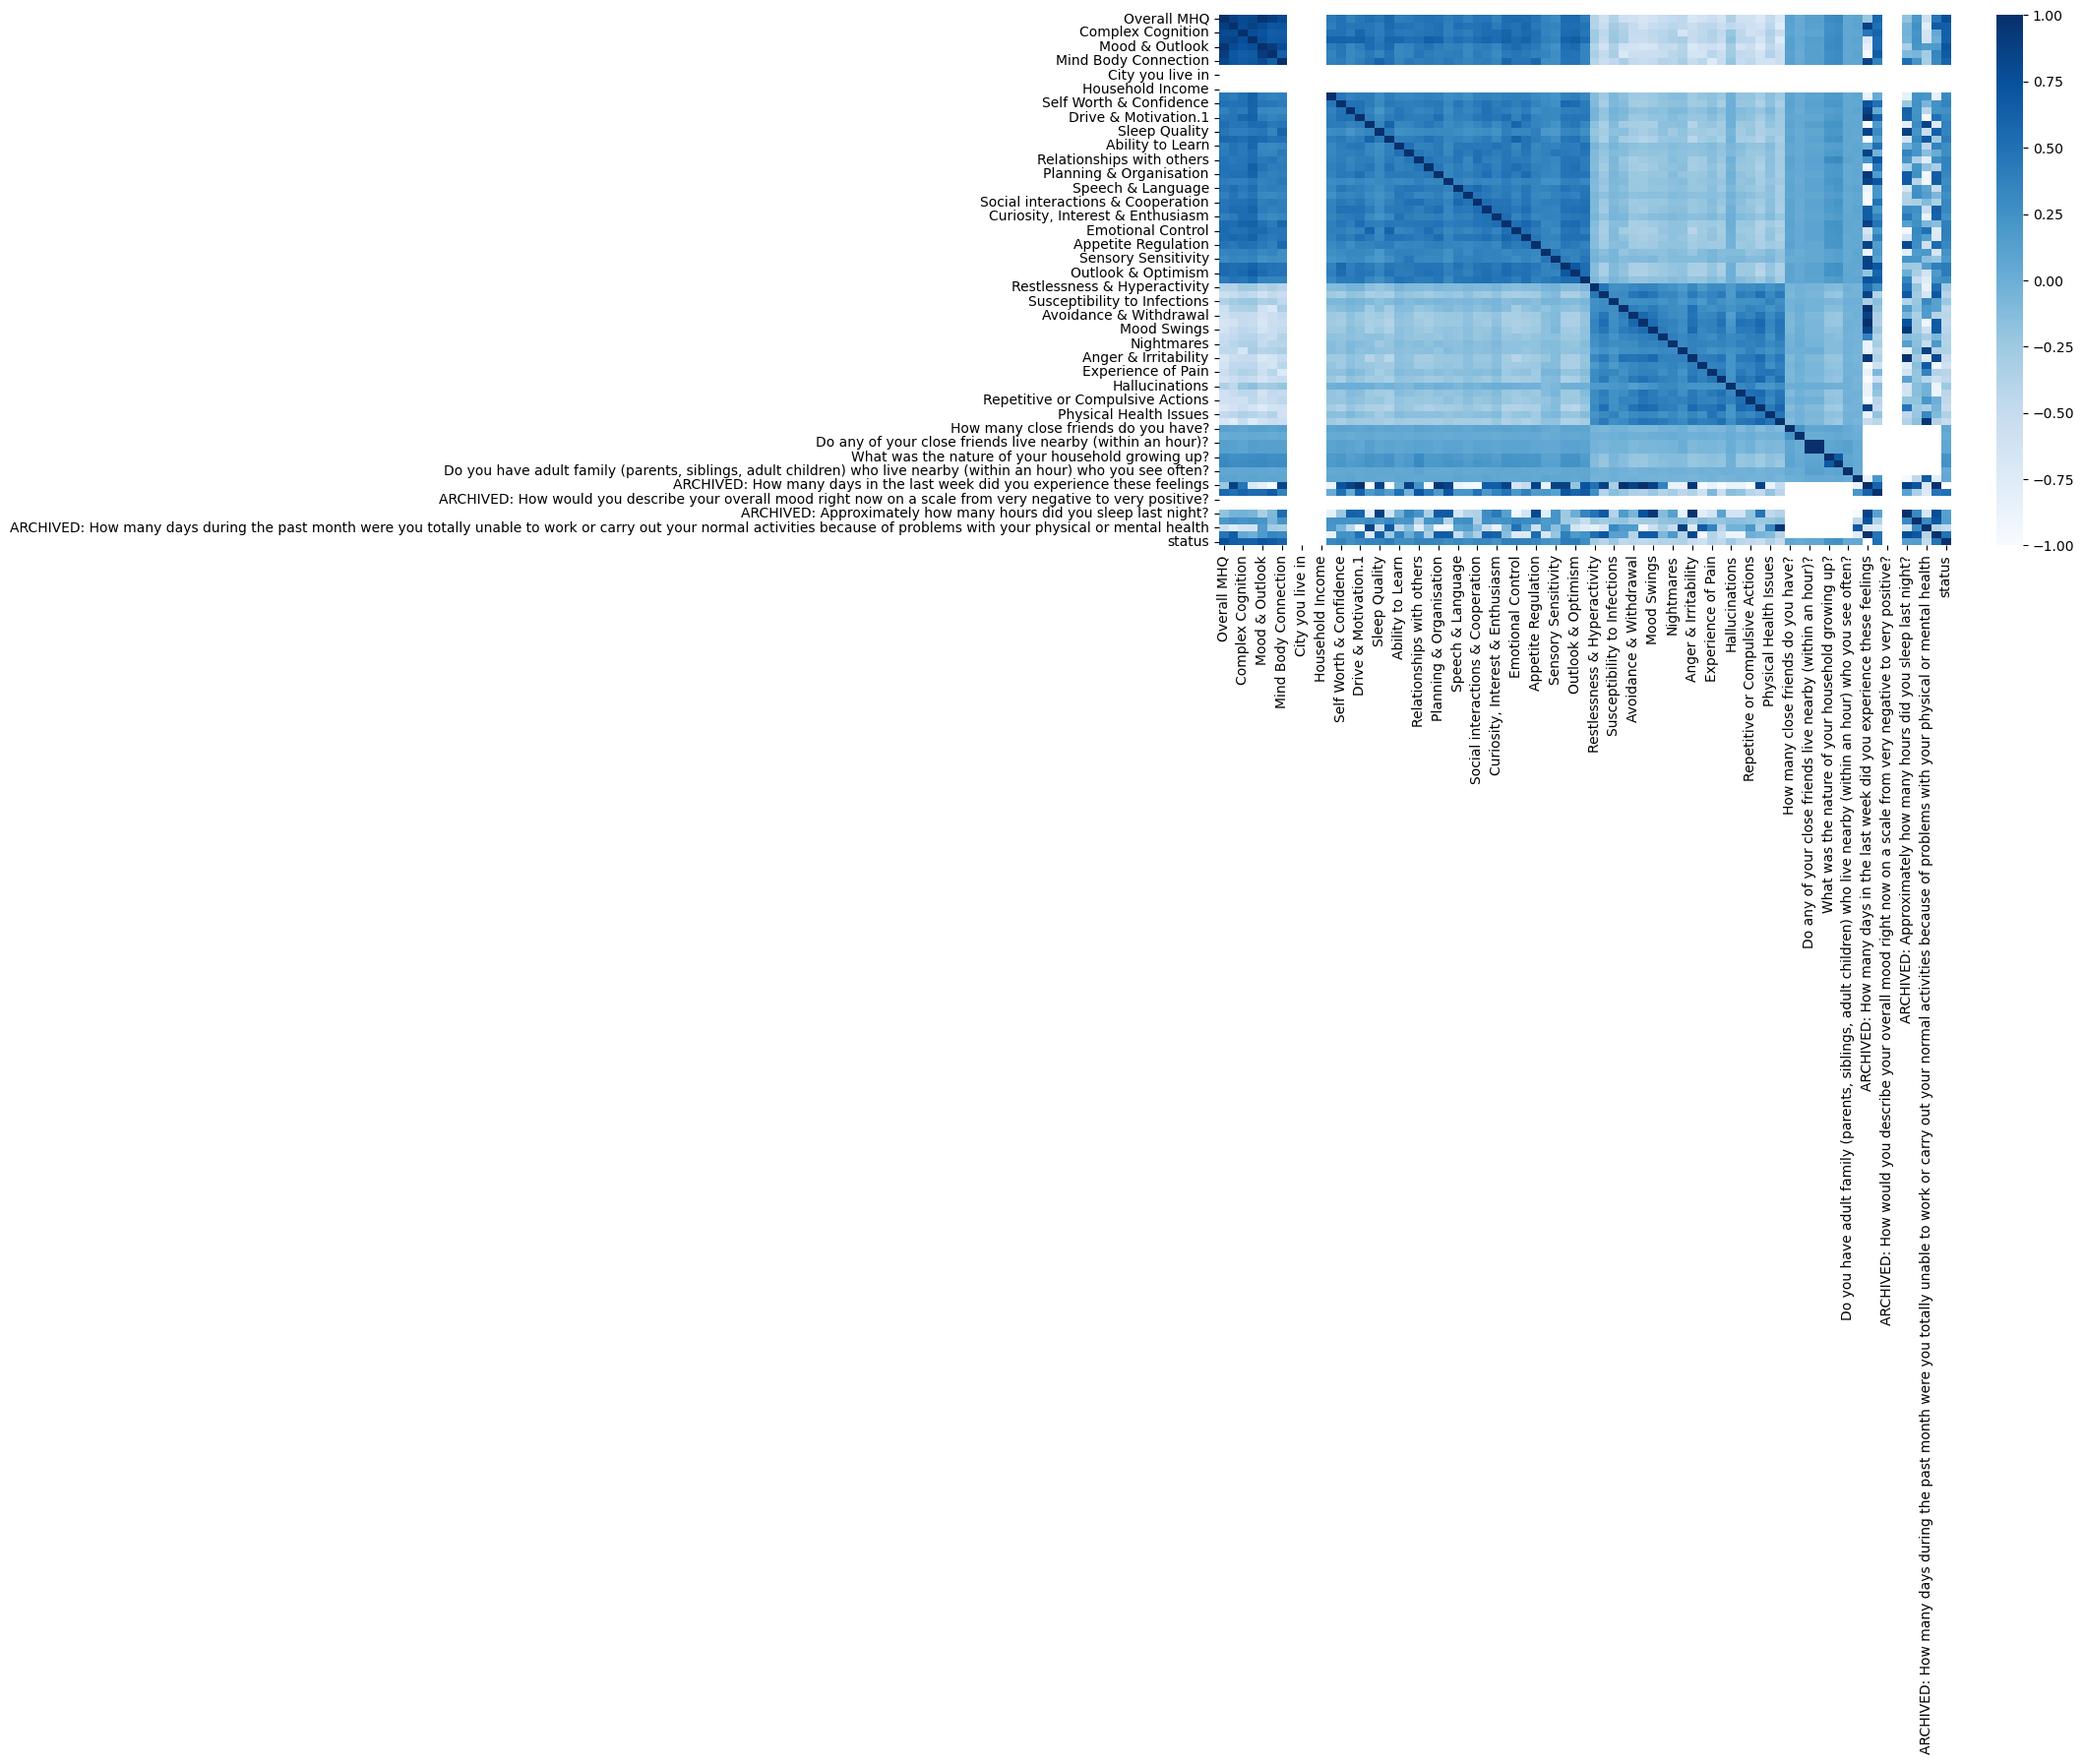

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=False, cmap='Blues')
plt.tight_layout()

In [11]:
# CORE COGNITION
#getting non null rows for the intermediate model
df = df.dropna(axis='columns')
#dropping useless cols
df = df.drop(["Language","Overall MHQ","Complex Cognition","Drive & Motivation","Mood & Outlook","Social & Self","Mind Body Connection","Country"],axis='columns')
df.isnull()

,Core Cognition,Age,Education,Employment,Adaptability to Change,Self Worth & Confidence,Creativity & Problem Solving,Drive & Motivation.1,Stability & Calmness,Sleep Quality,...,Confusion or Slowed Thinking,How regularly to you engage in physical exercise (30 minutes or more)?,How regularly do you socialize with friends in person?,Do you have a diagnosed medical disorder that significantly impacts your way of life?,Are you currently seeking treatment for any mental health concerns?,Understanding,Start Date (UTC),Submit Date (UTC),Time to completion,status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9956,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9957,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
print(df["Primary nature of strange, unwanted or obsessive thoughts"].unique())

['|Your relationship with one or more people that you know  (e.g. thinking constantly about a particular person in an unhealthy way)'
 nan
 '|Your relationship with one or more people that you know  (e.g. thinking constantly about a particular person in an unhealthy way)|Possible disasters that could happen (e.g. imagining someone close to you will die or that you will have a car accident)'
 '|Something negative or bad that you experienced in the past'
 '|Your relationship with one or more people that you know  (e.g. thinking constantly about a particular person in an unhealthy way)|Order of things in your environment (e.g. aligning edges and positioning of objects| walking a certain way)'
 '|Your relationship with one or more people that you know  (e.g. thinking constantly about a particular person in an unhealthy way)|Something negative or bad that you experienced in the past'
 '|Something negative or bad that you experienced in the past|Your relationship with one or more people that

In [ ]:
#fixing gender and age  rows
age = df["Age"]
for i,n in enumerate(age):
    age[i] = int(n[:2])
df["Age"] = age

df["Biological Sex"].replace({"Female":1,"Male":2,"":0,"Other/Intersex":0,"Prefer not to say":0},inplace=True)
#dropping useless rows and fixing gender rows with one hot encoding
df.drop(["Is identity different from biological sex","Specified identity","Country","State","Ethnicity"],inplace=True)


In [21]:
pd.get_dummies(df, drop_first = True, columns = ['Describe your place of living'] ).head()
df.drop(["City you live in"],inpace=True)
df["How many other people do you share your home with?"].replace({"6+":6,"":1},inplace=True)
pd.get_dummies(df, drop_first = True, columns = ['What is your current family situation?'] ).head()
df["How many brothers and sisters did you have when you were growing up?"].replace({'4':4, '5+':5,'1':1,'2':2,'3':3,'None':0,'Prefer not to say':3,"":3},inplace=True)
pd.get_dummies(df, drop_first = True, columns = ["Education"] ).head()
pd.get_dummies(df, drop_first = True, columns = ["Employment"] ).head()
df.drop(["Do you currently work in any of the following professions/sectors?","Household Income","Household"],inpace=True)


SyntaxError: unterminated string literal (detected at line 8) (4238573302.py, line 8)